In [2]:

import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn import metrics

import statsmodels.api as sm
from statsmodels.tools import eval_measures

In [3]:
properatti_df_bsas=pd.read_csv("./tp2_properati.csv", sep=",", encoding='utf-8')
properatti_df_bsas.sample(5)

,Unnamed: 0,barrio,price_usd_per_m2,surface_total_clean,rooms_clean,precios_nuevos,precios_aprox_usd_clean,amenities,estacionamiento,sum,pileta,parrilla,gimnasio,lavadero,solarium,quincho,baulera,terraza
24155,88569,Boca,721.649485,291.0,2.0,210000.0,210000.0,True,False,False,False,True,False,True,False,True,False,True
21144,78703,Flores,1653.846154,52.0,2.0,86000.0,86000.0,True,True,True,True,True,False,True,False,False,False,False
22970,85499,Almagro,NaN,49.0,2.0,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False
9073,35859,Boca,NaN,291.0,3.0,84900.0,84900.0,True,False,True,False,False,False,False,False,False,False,False
8891,35037,Caballito,NaN,551.0,4.0,155000.0,155000.0,True,False,True,False,False,False,False,False,False,True,False


In [4]:
lista=[]
for col in properatti_df_bsas.columns:
    lista.append(col)
print(lista)

['Unnamed: 0', 'barrio', 'price_usd_per_m2', 'surface_total_clean', 'rooms_clean', 'precios_nuevos', 'precios_aprox_usd_clean', 'amenities', 'estacionamiento', 'sum', 'pileta', 'parrilla', 'gimnasio', 'lavadero', 'solarium', 'quincho', 'baulera', 'terraza']


In [5]:
properatti_df_bsas=properatti_df_bsas*1
properatti_df_bsas.sample(5)

,Unnamed: 0,barrio,price_usd_per_m2,surface_total_clean,rooms_clean,precios_nuevos,precios_aprox_usd_clean,amenities,estacionamiento,sum,pileta,parrilla,gimnasio,lavadero,solarium,quincho,baulera,terraza
13948,53607,Almagro,2241.379310,58.0,3.0,130000.0,130000.0,1,0,0,0,0,0,1,0,0,0,0
6633,26286,Boedo,17082.666667,30.0,1.0,512480.0,512480.0,1,0,1,1,1,0,1,1,0,0,0
24467,89521,San Telmo,792.079208,404.0,11.0,320000.0,320000.0,1,0,0,0,0,0,0,0,1,0,1
31589,120706,Belgrano,NaN,42.0,1.0,NaN,NaN,1,0,1,1,0,1,1,0,0,0,0
28703,111112,Nunez,2163.461538,104.0,2.0,225000.0,225000.0,1,1,0,0,1,0,0,0,0,0,1


In [6]:
properatti_df_bsas.shape

(31942, 18)

In [7]:
properatti_df_bsas.isna().sum()

Unnamed: 0                    0
barrio                     1294
price_usd_per_m2           8819
surface_total_clean         149
rooms_clean                 177
precios_nuevos             2899
precios_aprox_usd_clean    2899
amenities                     0
estacionamiento               0
sum                           0
pileta                        0
parrilla                      0
gimnasio                      0
lavadero                      0
solarium                      0
quincho                       0
baulera                       0
terraza                       0
dtype: int64

In [8]:
llenado_nulos=properatti_df_bsas[properatti_df_bsas["price_usd_per_m2"].isnull()]
llenado_nulos.sample(4)

,Unnamed: 0,barrio,price_usd_per_m2,surface_total_clean,rooms_clean,precios_nuevos,precios_aprox_usd_clean,amenities,estacionamiento,sum,pileta,parrilla,gimnasio,lavadero,solarium,quincho,baulera,terraza
12812,49408,Belgrano,NaN,76.0,1.0,600000.0,600000.0,0,0,0,0,0,0,0,0,0,0,0
7103,27310,Flores,NaN,47.0,1.0,88000.0,88000.0,0,1,0,0,0,0,0,0,0,0,0
31760,120877,Chacarita,NaN,39.0,2.0,20000.0,20000.0,1,1,0,0,1,0,0,1,0,1,0
449,1928,Tribunales,NaN,40.0,1.0,85000.0,85000.0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
mask_precio=llenado_nulos[llenado_nulos["precios_nuevos"].notnull()]

In [10]:
mask_precio.head(4)

,Unnamed: 0,barrio,price_usd_per_m2,surface_total_clean,rooms_clean,precios_nuevos,precios_aprox_usd_clean,amenities,estacionamiento,sum,pileta,parrilla,gimnasio,lavadero,solarium,quincho,baulera,terraza
2,3,Liniers,NaN,290.0,3.0,95000.00000,95000.00,0,0,0,0,0,0,0,0,0,0,0
24,97,San Telmo,NaN,75.0,1.0,80693.70093,79851.93,0,1,0,0,0,0,0,0,0,0,0
30,120,Belgrano,NaN,290.0,3.0,178000.00000,178000.00,1,1,0,0,0,0,1,0,0,0,0
32,137,Colegiales,NaN,133.0,6.0,249000.00000,249000.00,1,0,0,0,0,0,0,0,0,0,1


In [11]:
mask_precio.shape

(5920, 18)

In [12]:
nonulos=mask_precio[mask_precio["surface_total_clean"].notnull()]
nonulos.isna().sum()

Unnamed: 0                    0
barrio                      115
price_usd_per_m2           5812
surface_total_clean           0
rooms_clean                   3
precios_nuevos                0
precios_aprox_usd_clean       0
amenities                     0
estacionamiento               0
sum                           0
pileta                        0
parrilla                      0
gimnasio                      0
lavadero                      0
solarium                      0
quincho                       0
baulera                       0
terraza                       0
dtype: int64

In [13]:
precio_n_por_m2=nonulos["precios_nuevos"]/nonulos["surface_total_clean"]
print(precio_n_por_m2.sample(4))
print(precio_n_por_m2.shape[0])

14001    1000.000000
2639     1719.101124
31761     512.820513
29880    1569.455556
dtype: float64
5812


In [14]:
properatti_df_bsas["price_usd_per_m2"] = properatti_df_bsas["price_usd_per_m2"].fillna(precio_n_por_m2.iloc[:])

In [15]:
properatti_df_bsas.isna().sum()

Unnamed: 0                    0
barrio                     1294
price_usd_per_m2           3007
surface_total_clean         149
rooms_clean                 177
precios_nuevos             2899
precios_aprox_usd_clean    2899
amenities                     0
estacionamiento               0
sum                           0
pileta                        0
parrilla                      0
gimnasio                      0
lavadero                      0
solarium                      0
quincho                       0
baulera                       0
terraza                       0
dtype: int64

In [16]:
properatti_df_bsas.iloc[15522,:]

Unnamed: 0                   59535
barrio                       Nunez
price_usd_per_m2           441.379
surface_total_clean            290
rooms_clean                      3
precios_nuevos              128000
precios_aprox_usd_clean     128000
amenities                        0
estacionamiento                  0
sum                              0
pileta                           0
parrilla                         0
gimnasio                         0
lavadero                         0
solarium                         0
quincho                          0
baulera                          0
terraza                          0
Name: 15522, dtype: object

In [17]:
#Se llenaron 5819 campos de la columna price_usd_per_m2
# se elimina la columna precios_aprox_usd_clean por encontrarse repetida
properatti_df_bsas=properatti_df_bsas.drop(labels='precios_aprox_usd_clean', axis=1)

In [18]:
properatti_df_bsas.sample(4)

,Unnamed: 0,barrio,price_usd_per_m2,surface_total_clean,rooms_clean,precios_nuevos,amenities,estacionamiento,sum,pileta,parrilla,gimnasio,lavadero,solarium,quincho,baulera,terraza
30662,118090,Villa Crespo,NaN,83.0,3.0,NaN,0,0,0,0,0,0,0,0,0,0,0
22651,84414,Flores,2288.461538,52.0,2.0,119000.0,0,1,0,0,0,0,0,0,0,0,0
21842,80921,Palermo,2650.000000,100.0,4.0,265000.0,1,0,0,0,0,0,1,0,0,1,0
12089,47106,Congreso,980.263158,76.0,1.0,74500.0,0,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

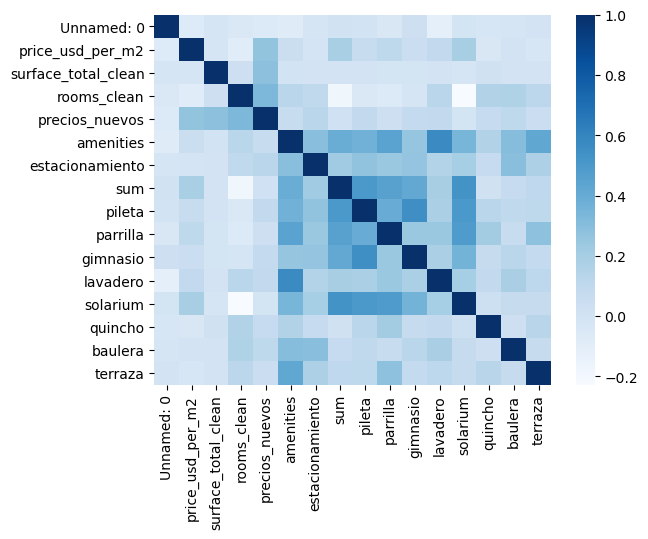

In [19]:
#Se busca alguna tendencia de correlacion para poder llenar las columnas faltantes
import seaborn as sns

correlation1=properatti_df_bsas.select_dtypes("number").corr()
sns.heatmap(correlation1, cmap="Blues")

In [20]:
print(correlation1.price_usd_per_m2)

Unnamed: 0            -0.066798
price_usd_per_m2       1.000000
surface_total_clean   -0.017344
rooms_clean           -0.087038
precios_nuevos         0.270195
amenities              0.051941
estacionamiento       -0.009974
sum                    0.192146
pileta                 0.070507
parrilla               0.109906
gimnasio               0.049274
lavadero               0.098650
solarium               0.196630
quincho               -0.035450
baulera               -0.001266
terraza               -0.028859
Name: price_usd_per_m2, dtype: float64


In [21]:
print(correlation1.precios_nuevos)


Unnamed: 0            -0.057351
price_usd_per_m2       0.270195
surface_total_clean    0.288533
rooms_clean            0.333027
precios_nuevos         1.000000
amenities              0.071491
estacionamiento        0.131545
sum                    0.025234
pileta                 0.093850
parrilla               0.039300
gimnasio               0.086107
lavadero               0.092133
solarium              -0.003342
quincho                0.080883
baulera                0.110101
terraza                0.047250
Name: precios_nuevos, dtype: float64


In [22]:
print(correlation1.surface_total_clean)

Unnamed: 0            -0.017871
price_usd_per_m2      -0.017344
surface_total_clean    1.000000
rooms_clean            0.041274
precios_nuevos         0.288533
amenities              0.007351
estacionamiento        0.001811
sum                   -0.000343
pileta                 0.000275
parrilla              -0.002389
gimnasio              -0.003869
lavadero               0.001638
solarium              -0.012175
quincho                0.014407
baulera                0.001727
terraza                0.000842
Name: surface_total_clean, dtype: float64


In [23]:
print(properatti_df_bsas.shape)
print(properatti_df_bsas.isna().sum())


(31942, 17)
Unnamed: 0                0
barrio                 1294
price_usd_per_m2       3007
surface_total_clean     149
rooms_clean             177
precios_nuevos         2899
amenities                 0
estacionamiento           0
sum                       0
pileta                    0
parrilla                  0
gimnasio                  0
lavadero                  0
solarium                  0
quincho                   0
baulera                   0
terraza                   0
dtype: int64


In [24]:
#Una vez ya terminada de limpiar la columna price-USD_per_m2 se procede a evaluar los métodos de regresión lineal múltiple

In [25]:
#sacamos los nulos para poder realizar las regresiones lineales
#Primero evaluo la cantidad de nulos que quedan si se toma solo los valores no nulos de price por m2
properatti_no_nulos=properatti_df_bsas.notna()
properatti_no_nulos.isna().sum()
properatti_no_nulos.shape

(31942, 17)

In [26]:
#Regresión lineal múltiple simple
feature_cols=["surface_total_clean", "rooms_clean", "precios_nuevos"]
X=properatti_no_nulos[feature_cols]
y=properatti_no_nulos.price_usd_per_m2
linreg=LinearRegression()
linreg.fit(X,y)
print(linreg.coef_)
print(linreg.intercept_)
print(linreg.score(X,y))



[7.26730268e-01 1.95019322e-04 9.88703739e-01]
-0.7166443210124173
0.9892131979017084


In [27]:
list(zip(feature_cols, linreg.coef_))

[('surface_total_clean', 0.7267302681779007),
 ('rooms_clean', 0.00019501932155180368),
 ('precios_nuevos', 0.9887037391746563)]

In [28]:
#Separamos el dataset en datos de entrenamiento y datos de testeo y aplicamos el modelo

def train_test_error(feature_cols):
    X = properatti_no_nulos[feature_cols]
    y = properatti_no_nulos.price_usd_per_m2

    X_train, X_test, y_train, y_test = train_test_split(X, y)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    
    
    print (feature_cols)
    print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
    print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print ('R2:', metrics.r2_score(y_test, y_pred))
    print ()
    return 

In [29]:
train_test_error(["surface_total_clean", "rooms_clean", "precios_nuevos"])

['surface_total_clean', 'rooms_clean', 'precios_nuevos']
MAE: 0.003833692875357602
MSE: 0.0009963477520621763
RMSE: 0.03156497666817095
R2: 0.9886296885994647



In [30]:
#Que ocurre si a este modelo le agregamos los amenities
train_test_error(["surface_total_clean", "rooms_clean", "precios_nuevos", 'amenities', 'estacionamiento', 'sum', 'pileta', 'parrilla', 'gimnasio', 'lavadero', 'solarium', 'quincho', 'baulera', 'terraza'])


['surface_total_clean', 'rooms_clean', 'precios_nuevos', 'amenities', 'estacionamiento', 'sum', 'pileta', 'parrilla', 'gimnasio', 'lavadero', 'solarium', 'quincho', 'baulera', 'terraza']
MAE: 0.003534760999960928
MSE: 0.0009304509085671088
RMSE: 0.030503293405255583
R2: 0.9888927514985637



In [31]:
#Se observa que el R2 mejora levemente


In [32]:
properatti_df_bsas_2=pd.read_csv("./tp2_properati.csv", sep=",", encoding='utf-8')

In [33]:
properatti_df_bsas_2 =properatti_df_bsas_2 * 1
properatti_df_bsas_2.isna().sum()

Unnamed: 0                    0
barrio                     1294
price_usd_per_m2           8819
surface_total_clean         149
rooms_clean                 177
precios_nuevos             2899
precios_aprox_usd_clean    2899
amenities                     0
estacionamiento               0
sum                           0
pileta                        0
parrilla                      0
gimnasio                      0
lavadero                      0
solarium                      0
quincho                       0
baulera                       0
terraza                       0
dtype: int64

In [34]:
# Filtrado de nulls en filas con valores numericos. 
# Me quedo solo con las filas que tengan las tres columnas numericas con valores no nulos

numericos = [ "price_usd_per_m2", "surface_total_clean", "rooms_clean", "precios_nuevos" ]
no_numericos = ["estacionamiento", "sum", "amenities", "pileta", "parrilla", "gimnasio", "lavadero", "solarium", "quincho", "baulera", "terraza"]

mask = properatti_df_bsas_2[numericos].notna().all(axis=1)

properatti_no_nulls = properatti_df_bsas_2[mask]

print(properatti_no_nulls.shape)
properatti_no_nulls.isna().sum()


(23101, 18)


Unnamed: 0                   0
barrio                     821
price_usd_per_m2             0
surface_total_clean          0
rooms_clean                  0
precios_nuevos               0
precios_aprox_usd_clean      0
amenities                    0
estacionamiento              0
sum                          0
pileta                       0
parrilla                     0
gimnasio                     0
lavadero                     0
solarium                     0
quincho                      0
baulera                      0
terraza                      0
dtype: int64

In [35]:
# Normalizo usando preprocessing.scale
# metodo scale

scaler = StandardScaler()
normalized_values = scaler.fit_transform(properatti_no_nulls[numericos])

# Creo nuevas columnas
normalized_columns = [f"{col}_normalized" for col in numericos]

# Las lleno con valores normalizados
properatti_no_nulls[normalized_columns] = normalized_values

# metodo minmax
minmax = MinMaxScaler()
minmax.fit(properatti_no_nulls[numericos])
minmax_values = minmax.transform(properatti_no_nulls[numericos])


# Creo nuevas columnas
minmax_columns = [f"{col}_minmax" for col in numericos]

# Las lleno con valores normalizados
properatti_no_nulls[minmax_columns] = minmax_values


properatti_no_nulls

/Users/juanvassallo/anaconda3/envs/dhdsblend2021/lib/python3.8/site-packages/pandas/core/indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
/var/folders/cv/c6ctbt612w9_hm1ltt9l68vc0000gn/T/ipykernel_76381/515162513.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  properatti_no_nulls[normalized_columns] = normalized_values
/Users/juanvassallo/anaconda3/envs/dhdsblend2021/lib/python3.8/site-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying t

,Unnamed: 0,barrio,price_usd_per_m2,surface_total_clean,rooms_clean,precios_nuevos,precios_aprox_usd_clean,amenities,estacionamiento,sum,...,baulera,terraza,price_usd_per_m2_normalized,surface_total_clean_normalized,rooms_clean_normalized,precios_nuevos_normalized,price_usd_per_m2_minmax,surface_total_clean_minmax,rooms_clean_minmax,precios_nuevos_minmax
0,0,Mataderos,1127.272727,55.0,2.0,62000.0,62000.0,1,0,0,...,0,0,-0.539591,-0.047563,-0.486685,-0.449877,0.005271,0.000225,0.071429,0.001224
1,2,Mataderos,1309.090909,55.0,2.0,72000.0,72000.0,1,0,0,...,0,0,-0.490270,-0.047563,-0.486685,-0.429079,0.006152,0.000225,0.071429,0.001439
3,7,Belgrano,3066.666667,45.0,1.0,138000.0,138000.0,1,0,0,...,0,0,-0.013508,-0.055102,-1.147295,-0.291814,0.014672,0.000175,0.000000,0.002857
4,8,Belgrano,3000.000000,65.0,2.0,195000.0,195000.0,1,0,0,...,0,0,-0.031592,-0.040023,-0.486685,-0.173267,0.014349,0.000275,0.071429,0.004082
5,13,Palermo,2234.000000,50.0,1.0,111700.0,111700.0,1,0,1,...,0,1,-0.239378,-0.051333,-1.147295,-0.346512,0.010636,0.000200,0.000000,0.002292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31937,121160,Belgrano,2611.464968,157.0,4.0,410000.0,410000.0,1,0,0,...,1,0,-0.136987,0.029340,0.834534,0.273883,0.012465,0.000735,0.214286,0.008701
31938,121209,Belgrano,2611.464968,157.0,4.0,410000.0,410000.0,1,0,0,...,1,0,-0.136987,0.029340,0.834534,0.273883,0.012465,0.000735,0.214286,0.008701
31939,121215,Belgrano,7699.115044,113.0,3.0,870000.0,870000.0,1,1,1,...,0,1,1.243096,-0.003834,0.173924,1.230578,0.037128,0.000515,0.142857,0.018585
31940,121217,Villa Urquiza,2858.695652,46.0,1.0,131500.0,131500.0,1,1,0,...,0,1,-0.069923,-0.054348,-1.147295,-0.305333,0.013664,0.000180,0.000000,0.002717


In [36]:
# Regresion con nuevos datos normalizados 

def train_test_error_Juan(feature_cols):
    X = properatti_no_nulls[feature_cols]
    y = properatti_no_nulls.price_usd_per_m2

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=111)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    
    
    print (feature_cols)
    print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
    print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print ('R2:', metrics.r2_score(y_test, y_pred))
    print ()
    return 

In [41]:
# Regresion con todos los features normalizados
features = ["surface_total_clean_normalized", "rooms_clean_normalized", "precios_nuevos_normalized", "estacionamiento", "sum", "amenities", "pileta", "parrilla", "gimnasio", "lavadero", "solarium", "quincho", "baulera", "terraza"]
train_test_error_Juan(features)

['surface_total_clean_normalized', 'rooms_clean_normalized', 'precios_nuevos_normalized', 'estacionamiento', 'sum', 'amenities', 'pileta', 'parrilla', 'gimnasio', 'lavadero', 'solarium', 'quincho', 'baulera', 'terraza']
MAE: 1318.382749214494
MSE: 10432028.821560906
RMSE: 3229.865139841121
R2: 0.36464734345006933



In [40]:
# Regresion con todos los features minmax
features = ["surface_total_clean_minmax", "rooms_clean_minmax", "precios_nuevos_minmax", "estacionamiento", "sum", "amenities", "pileta", "parrilla", "gimnasio", "lavadero", "solarium", "quincho", "baulera", "terraza"]
train_test_error_Juan(features)

['surface_total_clean_minmax', 'rooms_clean_minmax', 'precios_nuevos_minmax', 'estacionamiento', 'sum', 'amenities', 'pileta', 'parrilla', 'gimnasio', 'lavadero', 'solarium', 'quincho', 'baulera', 'terraza']
MAE: 1318.382749214496
MSE: 10432028.821560923
RMSE: 3229.865139841124
R2: 0.3646473434500682



In [42]:
# Regresion con los features numericos
features = ["surface_total_clean_normalized", "rooms_clean_normalized", "precios_nuevos_normalized"]
train_test_error_Juan(features)

['surface_total_clean_normalized', 'rooms_clean_normalized', 'precios_nuevos_normalized']
MAE: 1214.5110613112884
MSE: 11536890.367325488
RMSE: 3396.599824431116
R2: 0.2973568163408511



In [43]:
# Regresion con los features no numericos (amenities)
features = ["estacionamiento", "sum", "amenities", "pileta", "parrilla", "gimnasio", "lavadero", "solarium", "quincho", "baulera", "terraza"]
train_test_error_Juan(features)

['estacionamiento', 'sum', 'amenities', 'pileta', 'parrilla', 'gimnasio', 'lavadero', 'solarium', 'quincho', 'baulera', 'terraza']
MAE: 1554.010354603831
MSE: 14805930.821646683
RMSE: 3847.847556965671
R2: 0.09825905956228131

